# Question 1: (1 pt)
In SIR models, letter R stands for

    Repaired
    Restored (+)
    Removed
    Re-infected


# Question 2: (1 pt)
System Dynamics approach represents patient population as

    Continuous, evolving mass
    Set of individual patients
    Hospital networks
    Infected and non-infected population (+)



# Question 3: (1 pt)
S(t)+I(t)+R(t) = const    means that 

    Number of infected people does not change
    The model does not depend on time
    Population is modeled as a continuous mass
    Total population size remains the same (+)


# Question 4: (1 pt)
Process mining

    Creates machine-learning model of the process
    Writes process data into a log file or database
    Reconstructs process flow from the process data (+)
    Makes sure process data is consistent


# Solve data problems 

In this section, we will build a few SIR models, and will use them to answer some “what if” questions (simulation models are great for this!).
Note that in SIR, the value of 1/β is typically interpreted as the average number of days for an infected person to keep infecting susceptible; 1/γ – the number of days for an infected person to recover. For instance, saying “it takes on average 10 days to recover” is the same as saying  “1/γ = 10”, or γ=0.1.

For all problems below, assume population of N=120,000 people, with one infected on “day zero”
(I[0] = 1/N = 1/120000). 

As always, pick the multiple choice with the number closest to your result. To see the full picture, make sure you run your model f0r sufficiently many days to capture the peak (make a plot for each problem to be sure).


In [18]:
def sim(I0, day, beta, gamma, k_vacc=0):
    S = [1 - I0]
    I = [I0]
    R = [0]
    for d in range(day):
        dS = - beta * I[-1] * S[-1] - k_vacc * S[-1]
        dI = beta * I[-1] * S[-1] - gamma * I[-1]
        dR = gamma * I[-1] + k_vacc * S[-1]
        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)
    return S, I, R

# Question 5: (5 pts)
Model A: baseline
Consider a baseline SIR model discussed in the class – with only two parameters, β and γ.
If β=0.2, and the recovery takes on average 20 days, what would be the highest (peak) fraction of infected people?

    0.1
    0.2
    0.3
    0.4(+)
    0.5

Checkpoint: The peak will happen on the 91st day


In [5]:
import matplotlib.pyplot as plt

In [9]:
N = 120000
beta = 0.2
gamma = 1/20
S, I, R = sim(1/N, 300, beta, gamma)

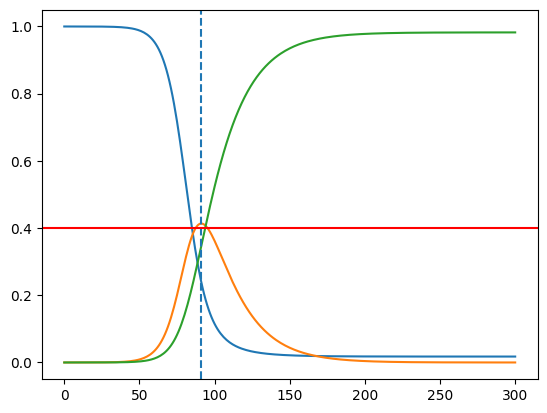

In [17]:
plt.plot(S)
plt.plot(I)
plt.plot(R)
plt.axvline(91, linestyle='--')
plt.axhline(0.4, c='red')

# Question 6: (6 pts)
Model B: vaccine
Consider the same model A as above. Let’s say, it represents a seasonal flu outbreak, and we already have a fast-acting vaccine. Therefore, let’s add kvacc vaccination parameter to the SIR model (as was described in the class).
What minimal fraction of the population do we have to vaccinate (kvacc value), to ensure that the peak number of infected will not exceed 2%?

    0.25%
    0.5%
    1%  (+)
    2%
    4%
Checkpoint: The peak will happen on the 125th day


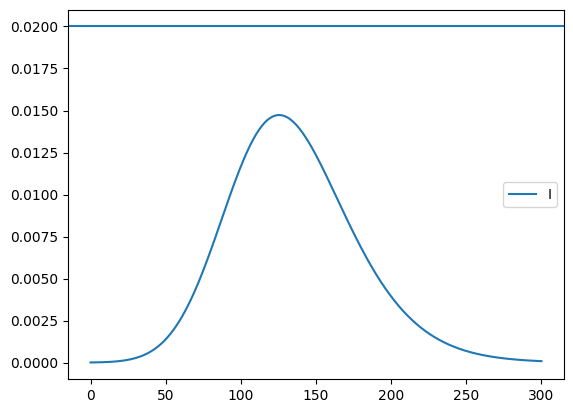

In [30]:
S, I, R = sim(1/N, 300, beta, gamma, k_vacc=0.01)
#plt.plot(S, label='S')
plt.plot(I, label='I')
#plt.plot(R, label='R')
plt.legend()
plt.axhline(0.02)

# Question 7: (3 pts)
Model C: faster recovery
Consider the same model A as above (that is, without vaccination). Assume that we have discovered, that vitamin D can shorten the average recovery time 1/γ by half. Keeping β=0.2 and reducing the average recovery time by half, will we be able to keep the peak infection under 10%?

    Yes
    No (+)
    Impossible to say with these values

Checkpoint: The peak will happen on the 120th day


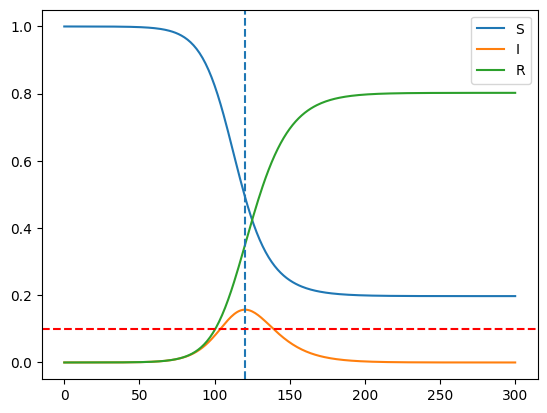

In [37]:
S, I, R = sim(1/N, 300, beta, gamma*2)
plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.axvline(120, linestyle='--')
plt.axhline(0.1, c = 'red', linestyle='--')

# Question 8: (6 pts)
Model D: social distancing
Consider the same model A as above. 
After the first month of pandemic, we realized that the things are not looking good, and decided to implement social distancing. By how much should we reduce the value of β=0.2 after the first month (30 days), to make sure the infection won’t peak above 10%?
Important: social distancing is expensive, so pick the lowest factor to achieve the goal.

    1.5 times
    1.7 times
    2.0 times
    2.5 times (+)
    3.0 times

Checkpoint: The peak will happen on the 249th day. Clearly, social distancing makes the pandemic longer, so make sure you simulate enough daypoints to capture the peak value!


In [42]:
def sim(I0, days, betas, gamma, k_vacc=0):
    S = [1 - I0]
    I = [I0]
    R = [0]
    for beta, day in zip(betas, days):
        for d in range(day):
            dS = - beta * I[-1] * S[-1] - k_vacc * S[-1]
            dI = beta * I[-1] * S[-1] - gamma * I[-1]
            dR = gamma * I[-1] + k_vacc * S[-1]
            S.append(S[-1] + dS)
            I.append(I[-1] + dI)
            R.append(R[-1] + dR)
    return S, I, R

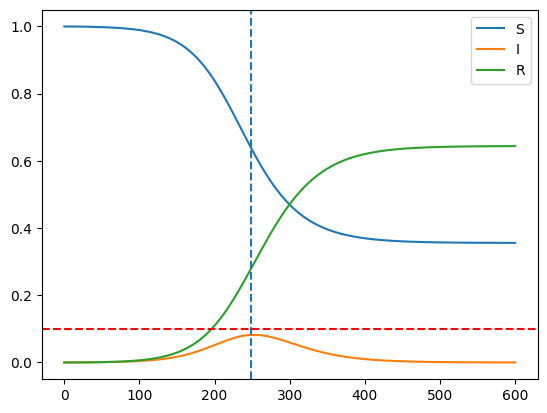

In [53]:
S, I, R = sim(1/N, [30, 570], [beta, beta/2.5], gamma)
plt.plot(S, label='S')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.legend()
plt.axvline(249, linestyle='--')
plt.axhline(0.1, c = 'red', linestyle='--')